In [13]:
import pandas as pd

mr = pd.read_json("https://storage.googleapis.com/geospiza/query/mapleroyals-online-count.json")
ml = pd.read_json("https://storage.googleapis.com/geospiza/query/maplelegends-online-count.json")
dream = pd.read_json("https://storage.googleapis.com/geospiza/query/dreamms-online-count.json")

In [14]:
mr

timestamp  onlineCount
0     2021-07-22 06:45:00.796000+00:00         1218
1     2021-07-22 06:30:00.893000+00:00         1219
2     2021-07-22 06:15:01.491000+00:00         1204
3     2021-07-22 06:00:01.194000+00:00         1213
4     2021-07-22 05:45:00.776000+00:00         1210
...                                ...          ...
19492 2020-12-23 07:30:01.578000+00:00         1987
19493 2020-12-23 07:15:01.079000+00:00         1964
19494 2020-12-23 07:00:01.385000+00:00         1978
19495 2020-12-23 06:45:01.177000+00:00         2027
19496 2020-12-23 06:42:01.096000+00:00         2018

[19497 rows x 2 columns]

In [15]:
ml

timestamp  usercount
0     2021-07-22 06:45:01.222000+00:00       1084
1     2021-07-22 06:30:01.181000+00:00       1101
2     2021-07-22 06:15:01.145000+00:00       1127
3     2021-07-22 06:00:01.021000+00:00       1173
4     2021-07-22 05:45:00.801000+00:00       1193
...                                ...        ...
38185 2020-06-10 07:29:37.453000+00:00       2584
38186 2020-06-10 07:29:04.642000+00:00       2583
38187 2020-06-10 07:26:54.690000+00:00       2574
38188 2020-06-10 07:26:35.179000+00:00       2574
38189 2020-06-10 07:16:52.276000+00:00       2540

[38190 rows x 2 columns]

In [16]:
dream

timestamp  usercount
0   2021-07-22 06:45:01.105000+00:00       1230
1   2021-07-22 06:30:01.195000+00:00       1251
2   2021-07-22 06:15:01.642000+00:00       1264
3   2021-07-22 06:00:01.878000+00:00       1263
4   2021-07-22 05:45:01.661000+00:00       1260
..                               ...        ...
493 2021-07-17 02:45:01.628000+00:00       1133
494 2021-07-17 02:30:01.492000+00:00       1128
495 2021-07-17 02:15:01.695000+00:00       1099
496 2021-07-17 02:06:52.475000+00:00       1086
497 2021-07-17 02:00:02.099000+00:00       1080

[498 rows x 2 columns]

<AxesSubplot:xlabel='timestamp'>

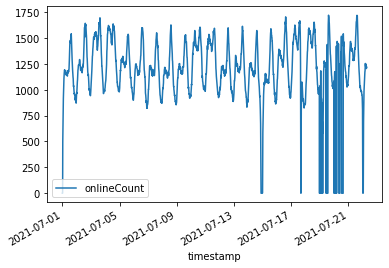

In [17]:
mr[mr.timestamp > "2021-07"].plot("timestamp", "onlineCount")

<AxesSubplot:xlabel='timestamp'>

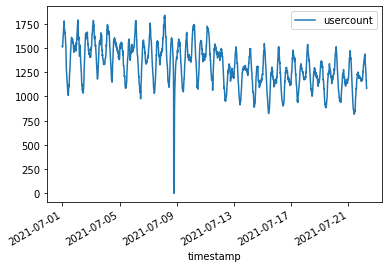

In [18]:
ml[ml.timestamp > "2021-07"].plot("timestamp", "usercount")

<AxesSubplot:xlabel='timestamp'>

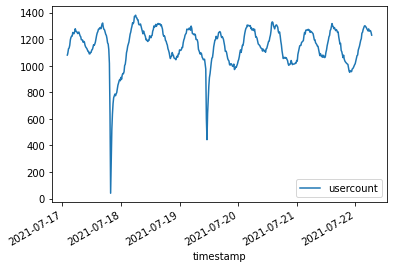

In [19]:
dream[dream.timestamp > "2021-07"].plot("timestamp", "usercount")

In [20]:
mr.timestamp = mr.timestamp.dt.round("15min")
ml.timestamp = ml.timestamp.dt.round("15min")
dream.timestamp = dream.timestamp.dt.round("15min")

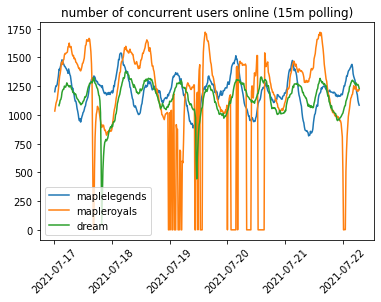

In [21]:
import matplotlib.pyplot as plt

ds = "2021-07-17"
ml_trunc = ml[ml.timestamp > ds]
mr_trunc = mr[mr.timestamp > ds]
dream_trunc = dream[dream.timestamp > ds]

plt.title("number of concurrent users online (15m polling)")
plt.plot(ml_trunc.timestamp, ml_trunc.usercount, label="maplelegends")
plt.plot(mr_trunc.timestamp, mr_trunc.onlineCount, label="mapleroyals")
plt.plot(dream_trunc.timestamp, dream_trunc.usercount, label="dream")
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()

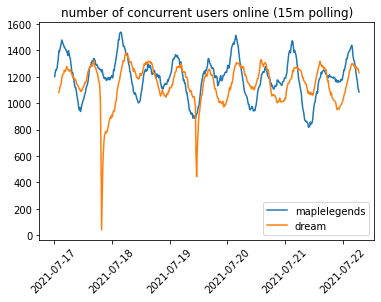

In [22]:
plt.title("number of concurrent users online (15m polling)")
plt.plot(ml_trunc.timestamp, ml_trunc.usercount, label="maplelegends")
plt.plot(dream_trunc.timestamp, dream_trunc.usercount, label="dream")
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()

Text(0.5, 0, 'magnitude')

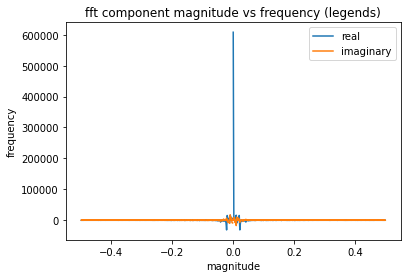

In [48]:
import numpy as np
sp = np.fft.fft(ml_trunc.usercount)
freq = np.fft.fftfreq(ml_trunc.shape[0])

plt.title("fft component magnitude vs frequency (legends)")
plt.plot(freq, sp.real, label="real")
plt.plot(freq, sp.imag, label="imaginary")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("magnitude")

Text(0.5, 0, 'magnitude')

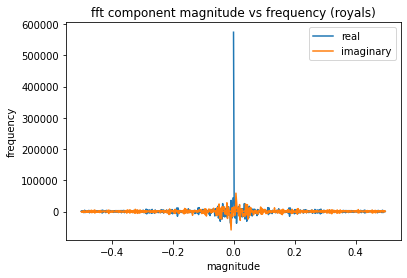

In [49]:
sp = np.fft.fft(mr_trunc.onlineCount)
freq = np.fft.fftfreq(mr_trunc.shape[0])

plt.title("fft component magnitude vs frequency (royals)")
plt.plot(freq, sp.real, label="real")
plt.plot(freq, sp.imag, label="imaginary")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("magnitude")

Text(0.5, 0, 'magnitude')

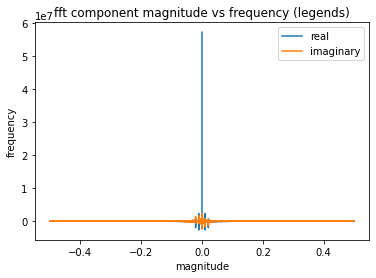

In [55]:
import numpy as np
sp = np.fft.fft(ml.usercount)
freq = np.fft.fftfreq(ml.shape[0])

plt.title("fft component magnitude vs frequency (legends)")
plt.plot(freq, sp.real, label="real")
plt.plot(freq, sp.imag, label="imaginary")
plt.legend()
plt.ylabel("frequency")
plt.xlabel("magnitude")

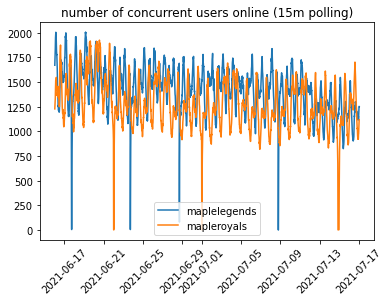

In [13]:
ml_trunc = ml[ml.timestamp > "2021-06-16"]
mr_trunc = mr[mr.timestamp > "2021-06-16"]
plt.title("number of concurrent users online (15m polling)")
plt.plot(ml_trunc.timestamp, ml_trunc.usercount, label="maplelegends")
plt.plot(mr_trunc.timestamp, mr_trunc.onlineCount, label="mapleroyals")
plt.tick_params(axis='x', rotation=45)
plt.legend()
plt.show()